# Phonon magnitude analysis in theta-space
The dataset generated by `twist_ph.py` in theta-space mode is a matrix of phonon displacement vectors at a certain k-point over a sampled set of twist angles. This notebook shows a visualization of the magnitude of these vectors for each k-point.

In [2]:
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt
from itertools import product as prod
from __class_PhononConfig import TwistedRealspacePhonon
from pymatgen.io.vasp.inputs import Poscar
%matplotlib inline

## MoS2-0

In [9]:
ROOT = '/Users/jonathanlu/Documents'
DIRNAME = "tvMoS2"
THSPC_DIR = "theta"

# Change as necessary
M1_th_min, M1_th_max, M1_ntheta = np.loadtxt(f"{ROOT}/{DIRNAME}/theta.txt")
M1_ntheta = int(M1_ntheta)
KPT = 'Gamma'
print(f"{M1_ntheta} angles from {M1_th_min} to {M1_th_max}")

# Import dataset from the directory
log_name = r'$\Gamma$' if KPT == 'Gamma' else KPT
path = f'{ROOT}/{DIRNAME}/{THSPC_DIR}/{KPT}/thspc_mags.npy'
ppath = f'{ROOT}/{DIRNAME}/{THSPC_DIR}/{KPT}/thspc_phonons.npy'
poscars_uc = [Poscar.from_file(f'{ROOT}/{DIRNAME}/POSCAR_LAYER{i+1}') for i in range(2)]
M1_dataset = np.load(path)
M1_phonons = np.load(ppath)
M1_nmodes = M1_dataset.shape[1]
print("Dataset shape:", M1_dataset.shape)
print("Number of modes:", M1_nmodes)
M1_thetas = np.linspace(M1_th_min, M1_th_max, M1_ntheta)

101 angles from 0.01 to 10.0
Dataset shape: (101, 40, 1521, 3)
Number of modes: 40


In [10]:
M1_mean_umag = np.mean(LA.norm(M1_dataset, axis=-1), axis=2)
M1_max_umag = np.max(LA.norm(M1_dataset, axis=-1), axis=2)
M1_min_umag = np.min(LA.norm(M1_dataset, axis=-1), axis=2)
M1_max_uz = np.max(M1_dataset[:,:,:,-1], axis=2)
M1_min_uz = np.min(M1_dataset[:,:,:,-1], axis=2)
M1_mean_uz = np.mean(M1_dataset[:,:,:,-1], axis=2)

In [11]:
# Import the indices and extract the modes
M1_LB1_idxs = np.load(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/data/MoS2_LB1_idxs.npy')
M1_S_idxs = np.load(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/data/MoS2_S_idxs.npy')

M1_LB1_max = np.zeros(M1_ntheta)
M1_LB1_min = np.zeros(M1_ntheta)
M1_LB1_mean = np.zeros(M1_ntheta)
M1_LB1_max_z = np.zeros(M1_ntheta)
M1_LB1_min_z = np.zeros(M1_ntheta)
M1_LB1_mean_z = np.zeros(M1_ntheta)
M1_S_max = np.zeros(M1_ntheta)
M1_S_min = np.zeros(M1_ntheta)
M1_S_mean = np.zeros(M1_ntheta)

for i in range(M1_ntheta):
    M1_LB1_max[i] = M1_max_umag[i, M1_LB1_idxs[i]]
    M1_LB1_min[i] = M1_min_umag[i, M1_LB1_idxs[i]]
    M1_LB1_mean[i] = M1_mean_umag[i, M1_LB1_idxs[i]]
    M1_LB1_max_z[i] = M1_max_uz[i, M1_LB1_idxs[i]]
    M1_LB1_min_z[i] = M1_min_uz[i, M1_LB1_idxs[i]]
    M1_LB1_mean_z[i] = M1_mean_uz[i, M1_LB1_idxs[i]]
    
    M1_S_max[i] = M1_max_umag[i, M1_S_idxs[i]]
    M1_S_min[i] = M1_min_umag[i, M1_S_idxs[i]]
    M1_S_mean[i] = M1_mean_umag[i, M1_S_idxs[i]]
    
np.save(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/data/MoS2_LB1_max.npy', M1_LB1_max)
np.save(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/data/MoS2_LB1_min.npy', M1_LB1_min)
np.save(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/data/MoS2_LB1_mean.npy', M1_LB1_mean)
np.save(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/data/MoS2_LB1_max_z.npy', M1_LB1_max_z)
np.save(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/data/MoS2_LB1_min_z.npy', M1_LB1_min_z)
np.save(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/data/MoS2_LB1_mean_z.npy', M1_LB1_mean_z)

## Gr

In [12]:
DIRNAME = "tvGr" 

# Change as necessary
M2_th_min, M2_th_max, M2_ntheta = np.loadtxt(f"{ROOT}/{DIRNAME}/theta.txt")
M2_ntheta = int(M2_ntheta)
KPT = 'Gamma'
print(f"{M2_ntheta} angles from {M2_th_min} to {M2_th_max}")

# Import dataset from the directory
log_name = r'$\Gamma$' if KPT == 'Gamma' else KPT
path = f'{ROOT}/{DIRNAME}/{THSPC_DIR}/{KPT}/thspc_mags.npy'
ppath = f'{ROOT}/{DIRNAME}/{THSPC_DIR}/{KPT}/thspc_phonons.npy'
poscars_uc = [Poscar.from_file(f'{ROOT}/{DIRNAME}/POSCAR_LAYER{i+1}') for i in range(2)]
M2_dataset = np.load(path)
M2_phonons = np.load(ppath)
M2_nmodes = M2_dataset.shape[1]
print("Dataset shape:", M2_dataset.shape)
print("Number of modes:", M2_nmodes)
M2_thetas = np.linspace(M2_th_min, M2_th_max, M2_ntheta)

101 angles from 0.01 to 10.0
Dataset shape: (101, 61, 1521, 3)
Number of modes: 61


In [28]:
M2_mean_umag = np.mean(LA.norm(M2_dataset, axis=-1), axis=2)
M2_max_umag = np.quantile(LA.norm(M2_dataset, axis=-1), 0.75, axis=2)
M2_min_umag = np.quantile(LA.norm(M2_dataset, axis=-1), 0.25, axis=2)
M2_max_uz = np.quantile(M2_dataset[:,:,:,-1], 0.75, axis=2)
M2_min_uz = np.quantile(M2_dataset[:,:,:,-1], 0.25, axis=2)
M2_mean_uz = np.mean(M2_dataset[:,:,:,-1], axis=2)

In [35]:
# Import the indices and extract the modes
M2_LB1_idxs = np.load(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/data/Gr_LB1_idxs.npy')
M2_S_idxs = np.load(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/data/Gr_S_idxs.npy')

M2_LB1_max = np.zeros(M2_ntheta)
M2_LB1_min = np.zeros(M2_ntheta)
M2_LB1_mean = np.zeros(M2_ntheta)
M2_LB1_max_z = np.zeros(M2_ntheta)
M2_LB1_min_z = np.zeros(M2_ntheta)
M2_LB1_mean_z = np.zeros(M2_ntheta)
M2_S_max = np.zeros(M2_ntheta)
M2_S_min = np.zeros(M2_ntheta)
M2_S_mean = np.zeros(M2_ntheta)

for i in range(M2_ntheta):
    M2_LB1_max[i] = M2_max_umag[i, M2_LB1_idxs[i]]
    M2_LB1_min[i] = M2_min_umag[i, M2_LB1_idxs[i]]
    M2_LB1_mean[i] = M2_mean_umag[i, M2_LB1_idxs[i]]
    M2_LB1_max_z[i] = M2_max_uz[i, M2_LB1_idxs[i]]
    M2_LB1_min_z[i] = M2_min_uz[i, M2_LB1_idxs[i]]
    M2_LB1_mean_z[i] = M2_mean_uz[i, M2_LB1_idxs[i]]
    
    M2_S_max[i] = M2_max_umag[i, M2_S_idxs[i]]
    M2_S_min[i] = M2_min_umag[i, M2_S_idxs[i]]
    M2_S_mean[i] = M2_mean_umag[i, M2_S_idxs[i]]
    
np.save(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/data/Gr_LB1_max.npy', M2_LB1_max)
np.save(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/data/Gr_LB1_min.npy', M2_LB1_min)
np.save(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/data/Gr_LB1_mean.npy', M2_LB1_mean)
np.save(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/data/Gr_LB1_max_z.npy', M2_LB1_max_z)
np.save(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/data/Gr_LB1_min_z.npy', M2_LB1_min_z)
np.save(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/data/Gr_LB1_mean_z.npy', M2_LB1_mean_z)

<Figure size 432x288 with 0 Axes>

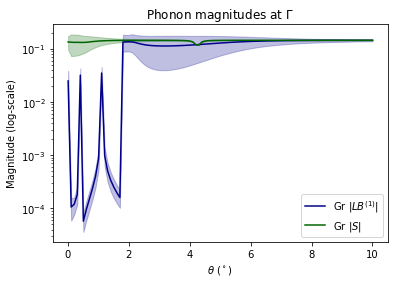

In [37]:
plt.clf()
_, ax = plt.subplots()
ax.set_title(fr"Phonon magnitudes at {log_name}")
ax.set_xlabel(r'$\theta$ ($^\circ$)')
ax.set_ylabel(r'Magnitude (log-scale)')

# ax.plot(M1_thetas[2:], M1_LB1_mean[2:], color='darkblue', label=r'$0^\circ$ MoS$_2$ $|LB^{(1)}|$')
# ax.plot(M1_thetas[2:], M1_LB1_max[2:], color='darkblue', alpha=0.25)
# # ax.plot(M1_thetas[2:], M1_LB1_mean_z[2:], color='darkred', label=r'$0^\circ$ MoS$_2$ $LB^{(1)}_z$')
# # ax.plot(M1_thetas[2:], M1_LB1_max_z[2:], color='darkred', alpha=0.25)
# ax.plot(M1_thetas[2:], M1_S_mean[2:], color='darkgreen', label=r'$0^\circ$ MoS$_2$ $|S|$')
# ax.plot(M1_thetas[2:], M1_S_max[2:], color='darkgreen', alpha=0.25)

ax.plot(M2_thetas[0:], M2_LB1_mean[0:], color='darkblue', label=r'Gr $|LB^{(1)}|$')
ax.fill_between(M2_thetas[0:], M2_LB1_min[0:], M2_LB1_max[0:], color='darkblue', alpha=0.25)
ax.plot(M2_thetas[0:], M2_S_mean[0:], color='darkgreen', label=r'Gr $|S|$')
ax.fill_between(M2_thetas[0:], M2_S_min[0:], M2_S_max[0:], color='darkgreen', alpha=0.25)

ax.legend()
ax.set_yscale("log")
plt.savefig("/Users/jonathanlu/Documents/data_mlph/mags.pdf")
plt.show()
